# Customer Churn Analysis

#### Churn analysis is the use of customer data to understand why they stopped using our service. The higher your churn rate, the more users, and revenue, you are losing. 

#### What is Customer Churn (Churn rate or Attrition rate)? --- The rate at which the customers leave a business/service against the total customers that are actively in the business/service. 

1. Churn rate: It also known as attrition rate or turnover rate, refers to how many consumers stop using your product or service over a given period. Think of it as the opposite of your retention rate–the percentage of customers who renew their subscriptions. 

2. Unlike other business models, subscription-based services rely on a consistent and steady stream of revenue coming from recurring payments. Churn serves as an indicator for customer satisfaction, perceived value, and overall business health. Churn rate is a crucial metric for calculating other metrics like Customer Lifetime Value (CLV). CLV is simply the average amount of revenue you can expect to generate from a single customer before they churn.

3. Understanding and managing churn is crucial for sustained subscription success. Knowing what percentage of customers might not return–and how much revenue they’re taking with them–is key to making informed decisions to improve the customer experience.

4. Analyzing churn gives you valuable insights into subscriber behavior that can help us design targeted strategies for product enhancements, customer retention, and ultimately strengthen long-term relationships.

5. Churn Rate = (No. of Churned Customers/ Total no. of Customers)_in a given period X 100 
Churn can be measured monthly, quarterly, or annually. While a monthly churn rate is useful for tracking short-term trends, your annual churn rate gives a broader picture of subscriber loyalty and attrition over a longer period. 

# 1. Problem Understanding(Statement) / Business Understanding

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set 
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

### Observation about the given data set: 

The data set contains the details of customers and it contains both numerical and categorical data. Here"Churn" is the target variable which contains two categorical values Yes or No. So the problem will be termed as "Classification Problem" where we need to predict the several churn using classfication models.

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# 2. Data Understanding (or) Exploratory Data Analysis (EDA) 

### What is EDA?


Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets. EDA is an approach to summarize their main characteristics, often employing statistical graphics and other data visualization methods.

EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

##### EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. 

Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today. 

EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA. 

In [6]:
# Checking the dimension of the data set
df.shape

(7043, 21)

The data set contains 7043 rows and 21 columns. Out of 21 column variables, 1 is target variable and remaining 20 are independent variables or features.

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Type casting columns of data set into a list
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
# Checking the data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are three different types (int64, float64 and object) of data present in the data set. 

### Cleaning the data set and dealing with missing values (None, NaN, NaT and others)

NaN (Not a Number) means missing value. It appears in numerical columns showing a missing value in that column.

None is very similar to NaN, but the only distinction is the type of None is not numeric, whereas the type of NaN is numeric.

NaT represents a missing date. This is specific to columns with the type DateTime. NaT stands for Not a Time.

In [10]:
# Checking for any null values present in any of the column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
# Simple way to get good overveiw about the data set (indexing, null values and data types of columns, memory, etc.) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see there are no null values present in the data set. 

Further observe that "TotalCharges" column type is object. What will be the reason?

<AxesSubplot:>

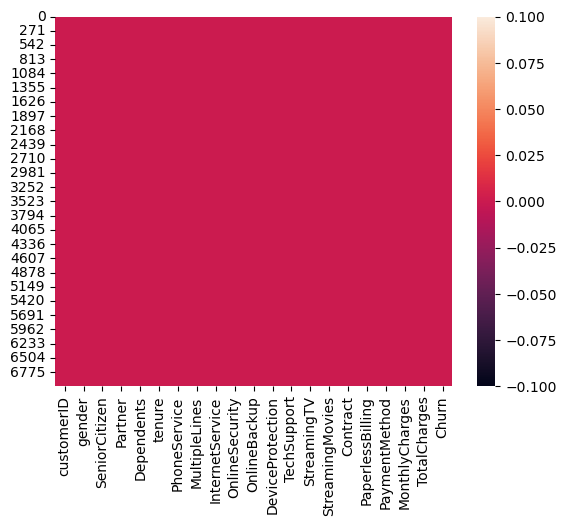

In [13]:
# Lets visualize missing values in each column by heatmap
sns.heatmap(df.isnull())

From the above heat map we can clearly visualize that there is no missing data present in the data set.

#### To check why Total Charges column type is object instead of float64 we will use the value counts of that column

In [14]:
# List of unique values in the column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
# Number of unique values in a given column
df['TotalCharges'].nunique()

6531

In [16]:
# checking the value counts of every column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

In [17]:
# checking the value counts of 'TotalCharges' column
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

#### From the above we can notice that "TotalCharges" column has continuous data but is reflecting as object data type. The reason is 11 records/rows of this column has blank data (containsblank spaces). For these 11 rows data type is "string" and for remaining rows type is "float64". Hence the column data type is object.


### Lets handle with this column

In [18]:
# Checking what rows are having blank space as a value in "Total Charges" column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From the above we can locate indexes of records in the "TotalCharges" column has space as values and it was showing 0 missing values in this column. Lets fill this column by some values other than blank space.


In the following, first we replace blank spaces with nan

In [19]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

We can see that after replacing blank spaces with "nan" the length of value counts "Total Charges" column decreased by 1 (before it was 6531). Because there is no data type for "nan" and blank space is string data type. 

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can see that "TotalCharges" column contains 11 null/missing values. isnull() method searches for both None and NaN values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
# converting "TotalCharges" column Dtype from object datatype to float datatype
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that "TotalCharges" column has some blank space values which are replaced by nan values and also we converted datatype to float from object.  Now lets handle with nan values.

In [24]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### How to Deal with Missing Data?
The concept of missing data is implied in the name: it’s data that is not captured for a variable for the observation in question. Missing data can skew all kinds of tasks for data scientists, from economic analyses to clinical trials. After all, any analysis is only as good as the data used. A data scientist doesn’t want to produce biased estimates that lead to invalid results. Fortunately, there are proven techniques to deal with missing data.

https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/

Replacing with Mean, Median and Mode:

This is one of the most common methods of imputing values when dealing with missing data. In cases where there are a small number of missing observations, data scientists can calculate the mean or median of the existing observations and insert them in place of the missing observations. However, when there are many missing variables, mean or median results can result in a loss of variation in the data. This method does not use time-series characteristics or depend on the relationship between the variables.


Here we replace "NaN" values mean of the non-null values of the column "TotalCharges"

In [25]:
# Finding the mean of the "TotalCharges" column
# mv = np.mean(df["TotalCharges"])
mv = df["TotalCharges"].mean()
print("Mean value of column TotalCharges",mv)

Mean value of column TotalCharges 2283.3004408418697


In [26]:
# Filling null values in TotalCharges column with its mean value
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [27]:
# Checking whether nan is replace with mean value at 488 index location 
df.iloc[488:490,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
489,8372-JUXUI,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.350000,Yes


In [28]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [29]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now we can see that there are no missing values in any of the column in a data set. 

Infact there are no missing values in the initial dataset. By careful consideration of the data set, we found that one of the column's ("TotalCharges") datatype is "object" instead of "float". Further digging that column contains no missing values but has blank spaces in 11 records - due to this reason the column data type is showing "object"

Firsttly, we replaced blank spaces with "NaN" values, secondly, we converted datatype to "float" from "object" and finally we replace "NaN" values with it's column mean value. 

Actually here you can ask a question? Instead of doing as above why can't we just replace "blank spaces" with mean of column or After first step why can't we replace directly with mean?

we can only find "mean/median" for numeric data type. For categorical data we can only find the "mode".

In [30]:
df.dtypes
len(df.dtypes)

21

In [31]:
# Separating Numerical and Categorical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
    else:
        numerical_col.append(i)

print(f"Categorical Columns:  {categorical_col} \n")
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [32]:
#  Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


### Feature selection
From the above, one can observe that customerID column has unique value for every customer. As part of feature selection here we can drop the "customerID" column. 

In general, a column with very low variance or uniform distribution can be dropped and one of the column from colliear columns can be dropped from the data set. Because such columns does not help in predicting the target variable. 

In [33]:
# Droping customerID column
df.drop("customerID", axis = 1, inplace = True)

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
# Checking the list of value counts of target
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

There are two categorical values present inthe target column namely "Yes" and "No"

In [36]:
# checking the value counts in target column
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Here we can assume that "No" stands for the customer who have not churned (with the company) and "Yes" stands for the customer who have got churned from the company (left the company). 

### Statistical Description of the Data Set 

In [37]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This provides the statistical information about the numerical columns of the data set. The summary looks perfect since there are no negative/ invalid values present.

Observations from the above Statistical description:

1. Count value is same for all columns which means there are no missing values in the data set 
2. The mean value is greater than the median (50%) value in tenure and TotalCharges columns which means that the data distribution is skewed towards right in these columns.
3. The mean value is less than the median (50%) value in the column MonthlyCharges which means the data distribution is skewed towards left in this columns.
4. By summarizing the data we can observe that there are huge differences between 75% and max values hence there are outliers present in the data.
5. We can also notice that Standard deviation, min, 25% percentile values for numerical columns from the describe method.

#### Few features of Normal Distribution (Gaussian/Bell-shaped)
1. Normal distributions are symmetric around their mean.
2. The mean, median, and mode of a normal distribution are equal.
3. The area under the normal curve is equal to 1.0.
4. Normal distributions are denser in the center and less dense in the tails.
5. Normal distributions are defined by two parameters, the mean (μ) and the standard deviation (σ).
6. 68% of the area of a normal distribution is within one standard deviation of the mean. (68.27%)
7. Approximately 95% of the area of a normal distribution is within two standard deviations of the mean. (95.45%)
8. Approximately 99% of the area of a normal distribution is within three standard deviations of the mean. (99.73%)

In [38]:
df.describe(include = "all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


## Data Visualization

### Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


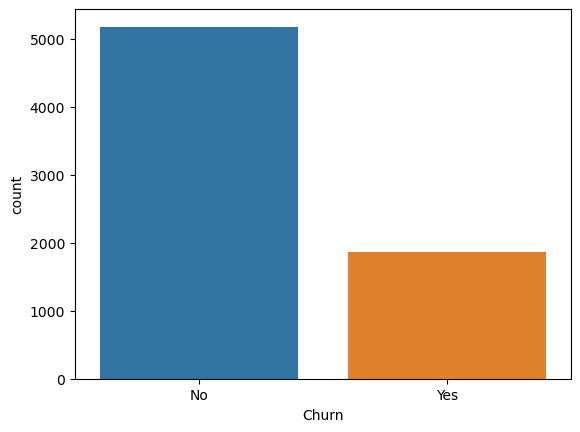

In [39]:
# Visualize the number of Churned customers
print(df["Churn"].value_counts())
ax = sns.countplot(x = "Churn", data = df)

#### From the univariate analysis, we can observe that the count of "No churn" are high compared to the count of "Yes churn". i.e, there are more number of customers who have not churned. This leads to class imbalance issue in the data. We will rectify it by using oversampling method in later part.

Male      3555
Female    3488
Name: gender, dtype: int64


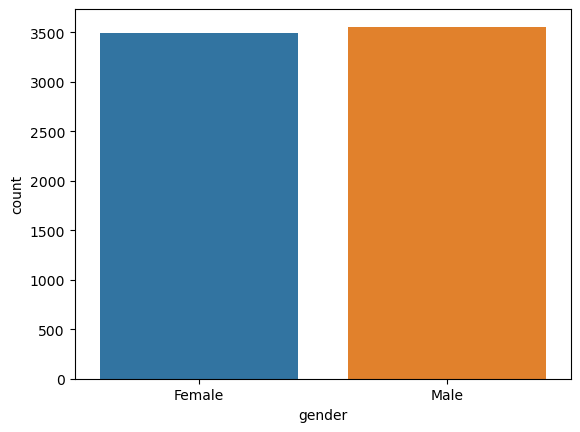

In [40]:
# Visualize the count of Gender column
print(df["gender"].value_counts())
ax = sns.countplot(x = "gender", data = df)
plt.show()

From the above we can observe that the total no. of males and females are almost same and hence no data imbalance here.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


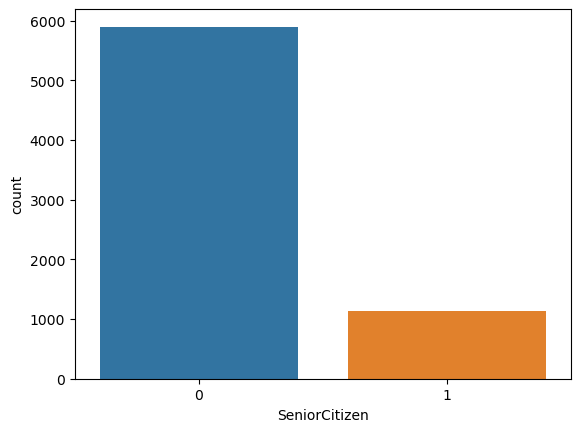

In [41]:
# Visualize the count of SeniorCitizen
print(df["SeniorCitizen"].value_counts())
ax = sns.countplot(x = "SeniorCitizen", data = df)
plt.show()

Here 0 represents non senior citizen and 1 represents senior citizen. The count of senior citizen is low compared to the count of non senior citizen. There is data imbalance problem. However, we don't need to worry about it because "SeniorCitizen" column is not a target variable in the data set.

No     3641
Yes    3402
Name: Partner, dtype: int64


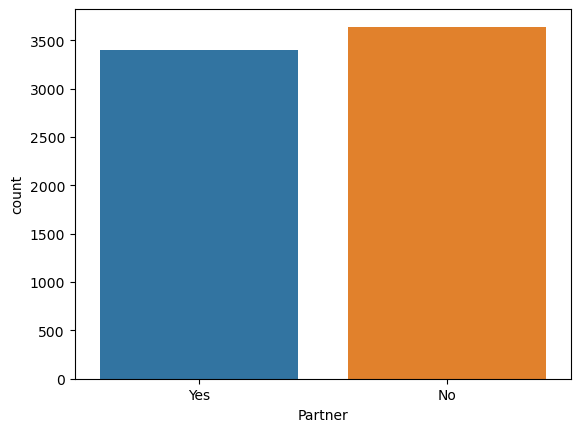

In [42]:
# Visualize the count of Partner column
print(df["Partner"].value_counts())
ax = sns.countplot(x = "Partner", data = df)
plt.show()

Count of non partners are bit high compared to the count of customers gaving partners. But they are of same order.

No     4933
Yes    2110
Name: Dependents, dtype: int64


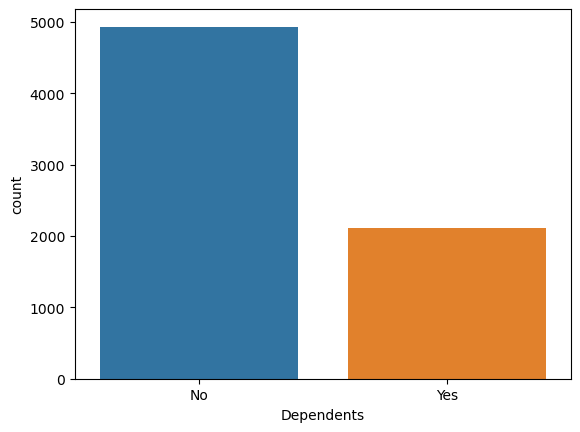

In [43]:
# Visualize the count of Dependents column
print(df["Dependents"].value_counts())
ax = sns.countplot(x = "Dependents", data = df)
plt.show()

The count of customers having dependents are less compared to the count of customers with no depemdents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


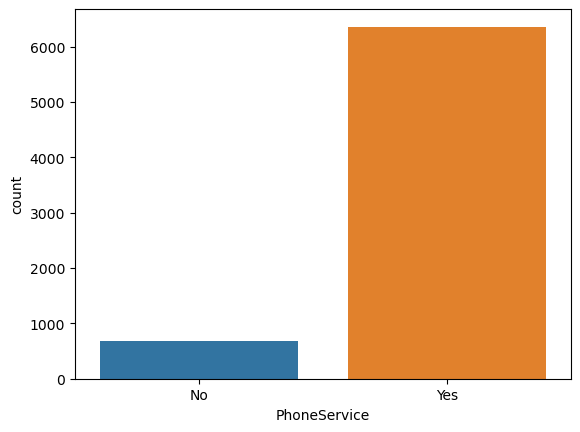

In [44]:
# Visualize the count of PhoneService column
print(df["PhoneService"].value_counts())
ax = sns.countplot(x = "PhoneService", data = df)
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


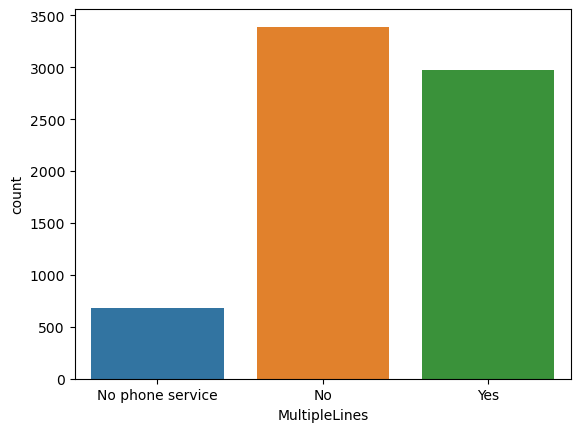

In [45]:
# Visualize the count of MultipleLines column
print(df["MultipleLines"].value_counts())
ax = sns.countplot(x = "MultipleLines", data = df)
plt.show()

The customers having phone services from single line have high counts compare dto the customers having phone services from multiple lines. Also the customers who do not have phone services have covered very less data compared to others.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


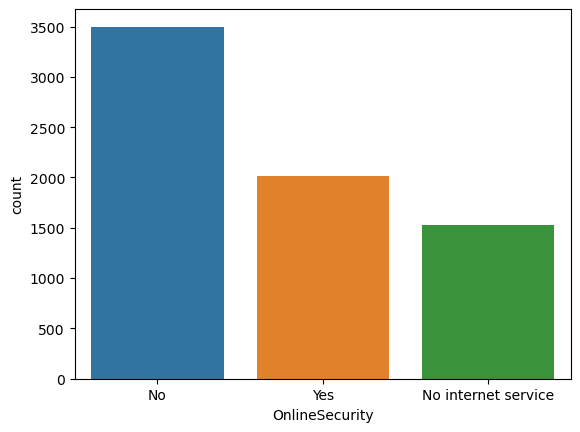

In [46]:
# Visualize the count of OnlineSecurity column
print(df["OnlineSecurity"].value_counts())
ax = sns.countplot(x = "OnlineSecurity", data = df)
plt.show()

The customers having internet services needs online security and who do not own any internet services, they don't need any online security.
From the above plot we can infere that the majority of customers who have internet services have low online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


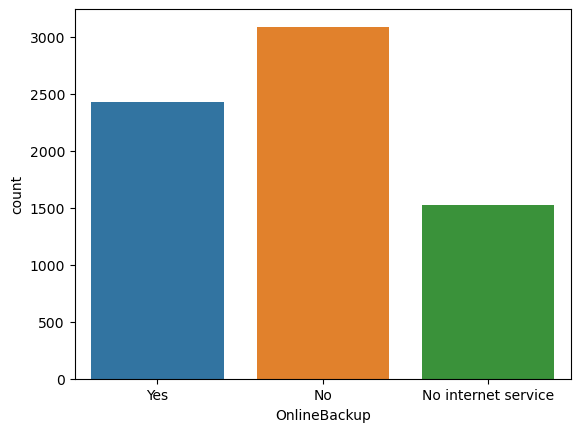

In [47]:
# Visualize the count of OnlineBackup column
print(df["OnlineBackup"].value_counts())
ax = sns.countplot(x = "OnlineBackup", data = df)
plt.show()

We can observe that count of customers with internet services and no online backup are more compared to others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


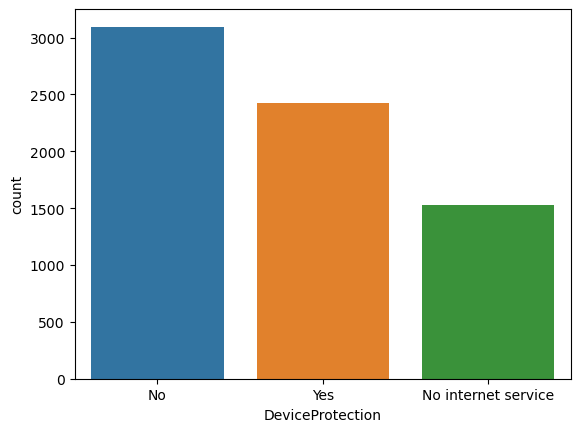

In [48]:
# Visualize the count of DeviceProtection
print(df["DeviceProtection"].value_counts())
ax = sns.countplot(x = "DeviceProtection", data = df)
plt.show()

Among the customers with internet services the no. of customers having device protection are less compared to no. of no device protection customers.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


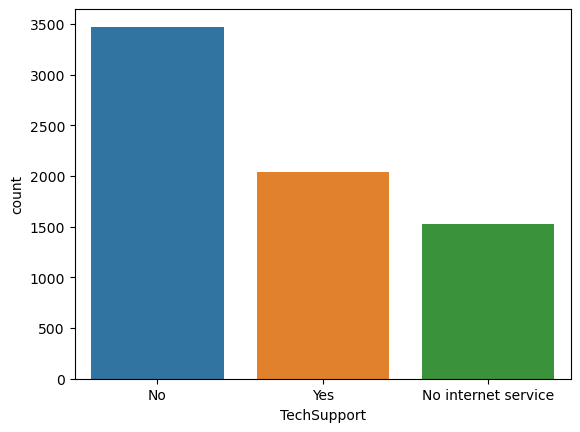

In [49]:
# Visualize the count of TechSupport
print(df["TechSupport"].value_counts())
ax = sns.countplot(x = "TechSupport", data = df)
plt.show()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


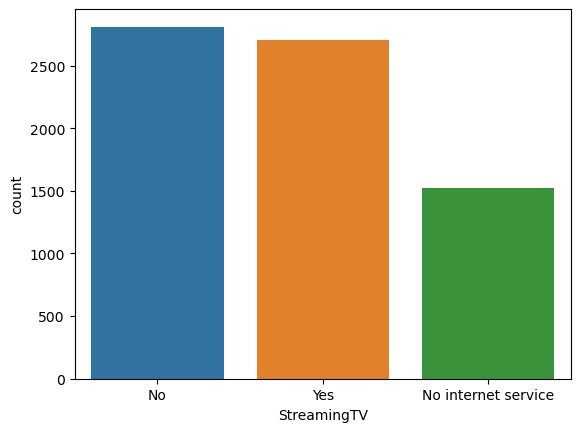

In [50]:
# Visualize the count of StreamingTV
print(df["StreamingTV"].value_counts())
ax = sns.countplot(x = "StreamingTV", data = df)
plt.show()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


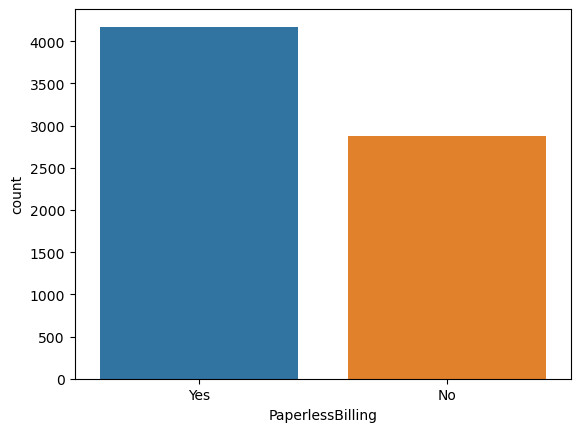

In [51]:
# Visualize the count of PaperlessBilling
print(df["PaperlessBilling"].value_counts())
ax = sns.countplot(x = "PaperlessBilling", data = df)
plt.show()

Most of the customers prefer paperless billing than receiving a paper billing.  

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


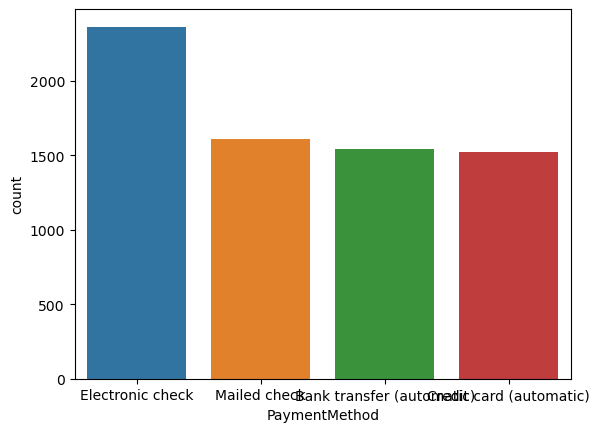

In [53]:
# Visualize the count of PaymentMethod
print(df["PaymentMethod"].value_counts())
ax = sns.countplot(x = "PaymentMethod", data = df)
plt.show()

Most customers prefer Electronic check payment method and the customers who prefer Mailed check, bank transfer and credit card have average count.

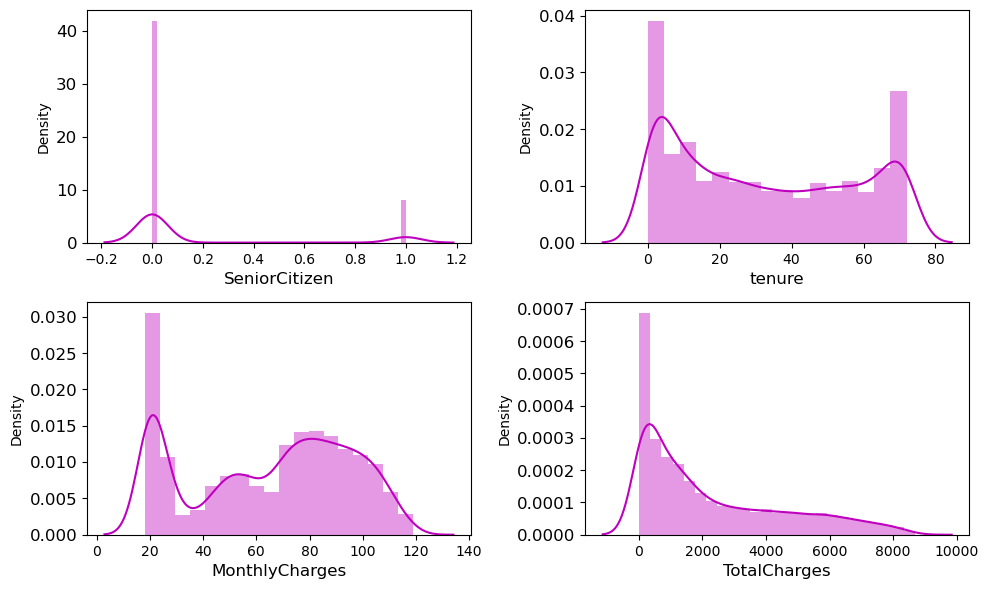

In [54]:
# Let's check how the data gas been distributed for each column
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1

for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    plotnumber += 1
    
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen, The data in column TotalCharges is skewed to the right which is very clear from the plot. Other two columns tenure and MonthlyCharges do not have skewness.

### Bivariate Analysis

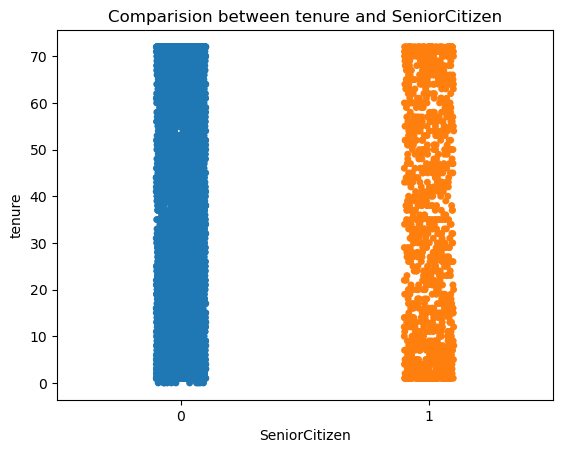

In [55]:
# Comparing tenure and SeniorCitizen
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen", y = "tenure", data = df)
plt.show()

There is no significance between these two features and both the features are in equal length.

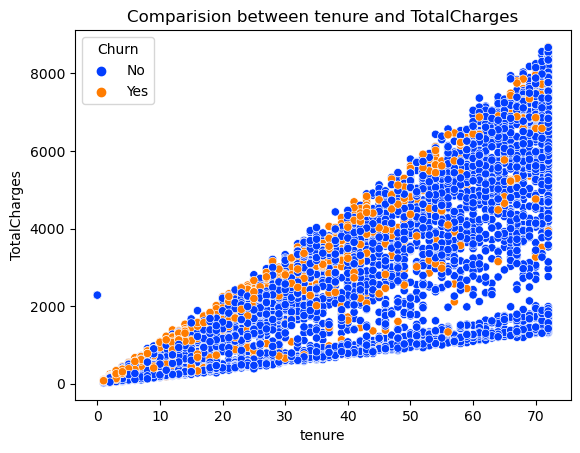

In [56]:
# Comparing tenure and TotalCharges
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot(x = "tenure", y = "TotalCharges", data = df, hue = "Churn", palette = "bright")
plt.show()

Here we can notice that the strong linear relation between the features tenure and TotalCharges.

As the tenure increases, TotalCharges also increases rapidly. Further, if customers have low tenure services then there is high chance for churn.

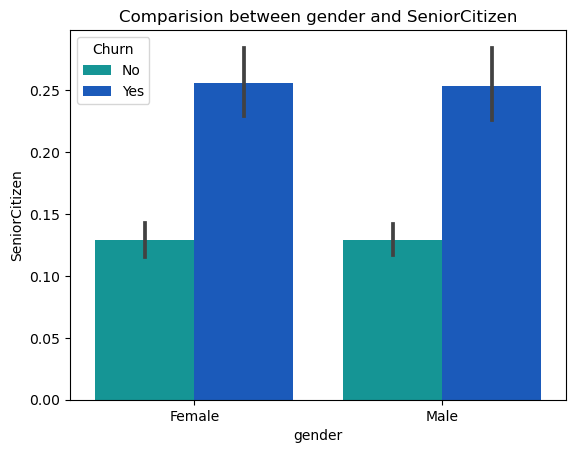

In [57]:
# Comparing gender and SeniorCitizen on the basis of Churn
plt.title("Comparision between gender and SeniorCitizen")
sns.barplot(x = "gender", y = "SeniorCitizen", data = df, hue = "Churn", palette = "winter_r")
plt.show()

There is no significant differences between the features. The customers churns remain unaffected by gender and SeniorCitizen case.

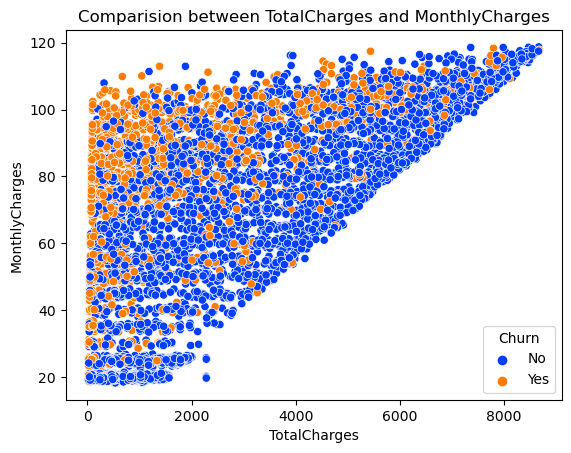

In [58]:
# Comparing TotalCharges and MonthlyCharges
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot(x = "TotalCharges", y= "MonthlyCharges", data = df, hue = "Churn", palette = "bright")
plt.show()

There is a linear relationship between thease two features. The customer with high monthly charges have high tendency to stop the services since they have total charges.

Also if customers ready to contribute with the monthly charges then there is an increment in the total charges.

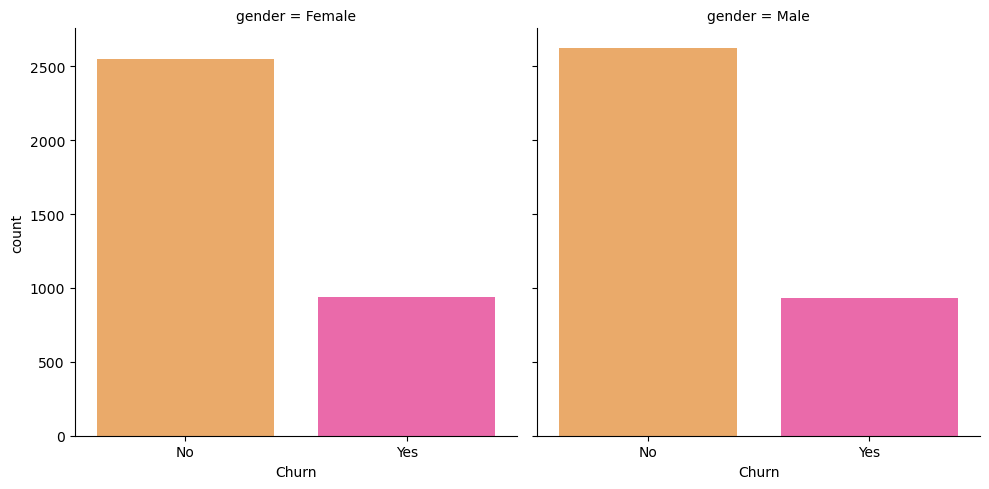

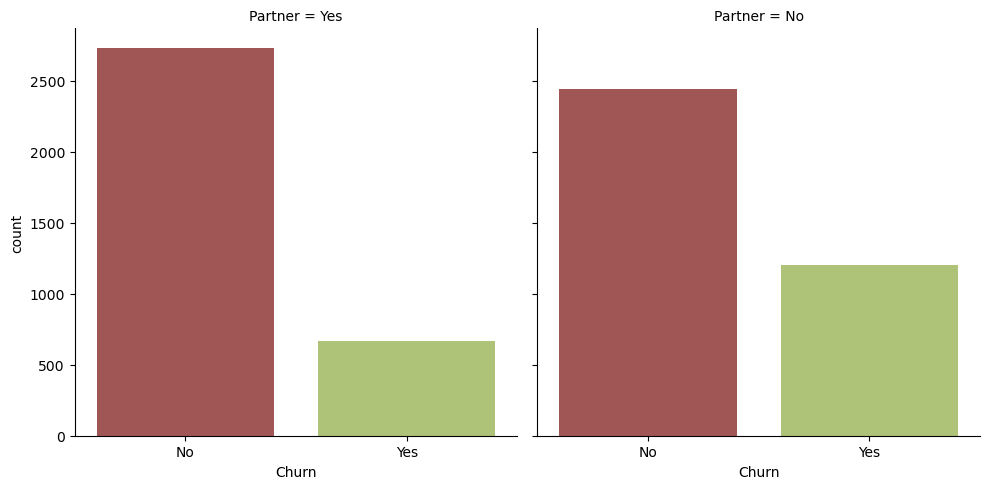

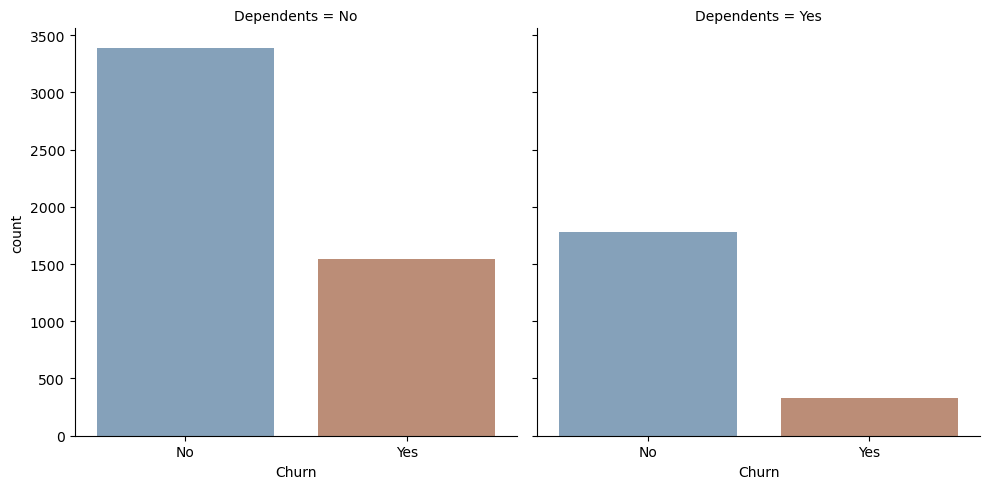

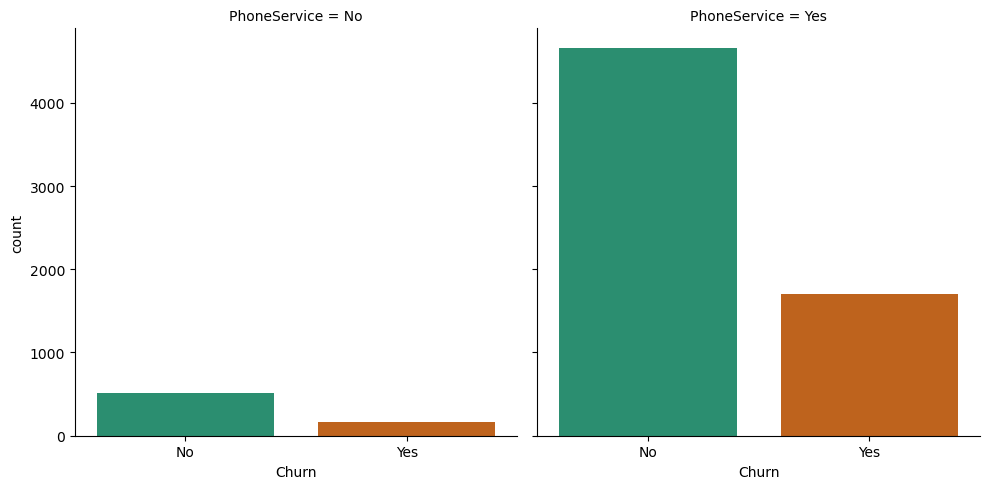

In [59]:
# Checking Churn level and gender
sns.catplot(x = "Churn", col = "gender", data = df, palette = "spring_r", kind = "count")
plt.show()

# Checking Churn level and Partner
sns.catplot(x = "Churn", col = "Partner", data = df, palette = "tab20b_r", kind = "count")
plt.show()

# Checking Churn level and Dependents
sns.catplot(x = "Churn", col = "Dependents", data = df, palette = "twilight_shifted", kind = "count")
plt.show()

# Checking Churn level and PhoneService
sns.catplot(x = "Churn", col = "PhoneService", data = df, palette = "Dark2", kind = "count")
plt.show()

1. In the first plot we can see there is no significant differences, both genders male and female have equal churn level.

2. In the second plot we can see that the customers without partners have high churn rate compared to the customers with partners.

3. The customers who do not have dependents have high churn rate compared to the customers with dependents.

4. From the last plot we can notice that the customers who have phone service are having high tendency of getting churned.

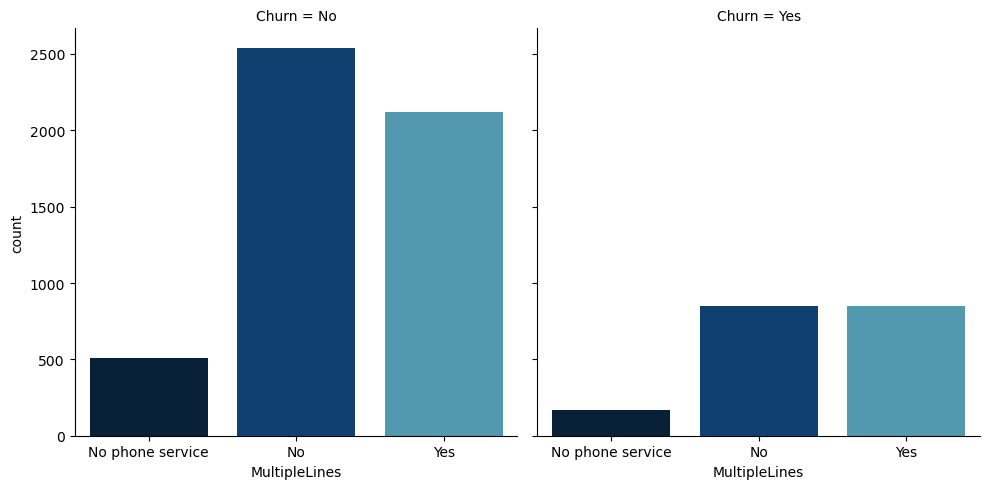

In [60]:
# Checking Churn level and MultipleLines
sns.catplot(x = "MultipleLines", col = "Churn", data = df, palette = "ocean", kind = "count")
plt.show()

The customers who have phone services from multiple linea and single line have the same churn rate. There are very less number of customers who do not have phone services.

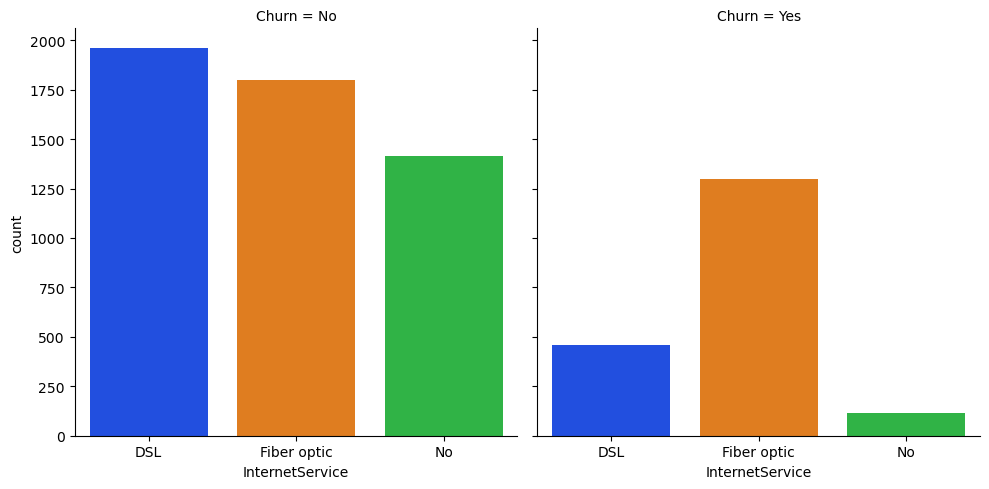

In [61]:
# Checking Churn level and InternetService
sns.catplot(x = "InternetService", col = "Churn", data = df, palette = "bright", kind = "count")
plt.show()

The churn rate is high when the customers prefer Fiber optic internet services compared to other services. May be Fiber optic internet service is bad and need to be focussed on. The customers who have DSL service have less churn rate compared to Fiber optic one. Further, the customers who do not have internet service have very less churn rate among all.

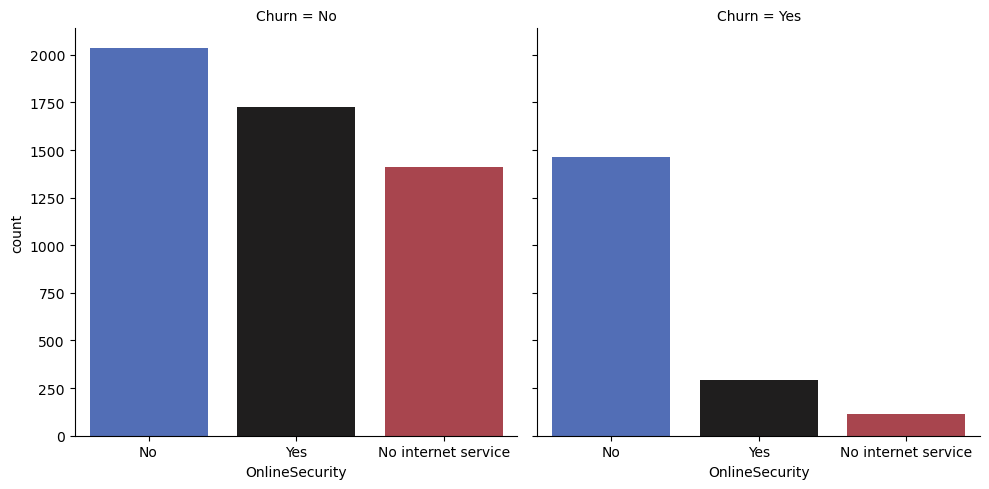

In [62]:
# Checking Churn level in OnlineSecurity
sns.catplot(x = "OnlineSecurity", col = "Churn", data = df, palette = "icefire", kind = "count")
plt.show()

The customers who don't have internet service have very less churn rate and the customers who don't have online security services gave high tendency of getting churned.

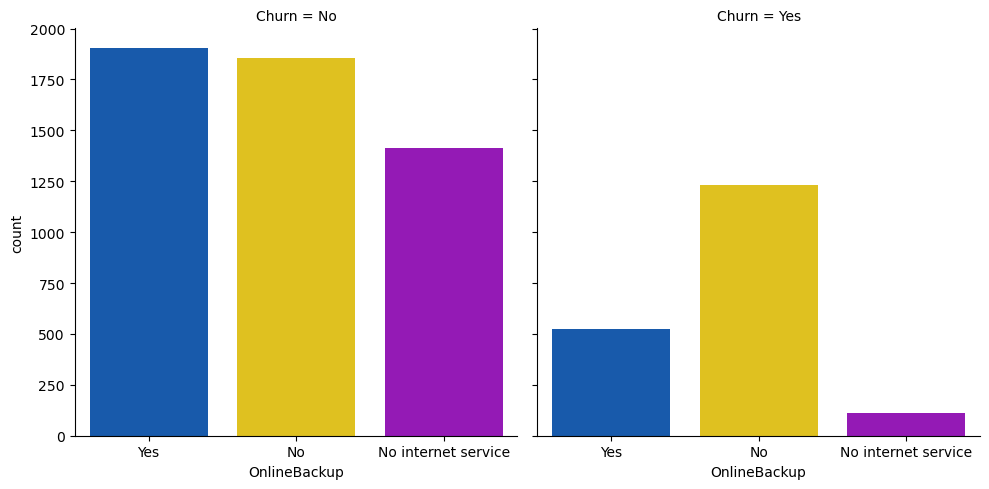

In [63]:
# Checking Churn level in OnlineBackup
sns.catplot(x = "OnlineBackup", col = "Churn", data = df, palette = "prism", kind = "count")
plt.show()

The customers who don't have  online backup services are having high churn rate than customers with backup service. It is obvious that the customers who don't have internet services don't need any online backup.

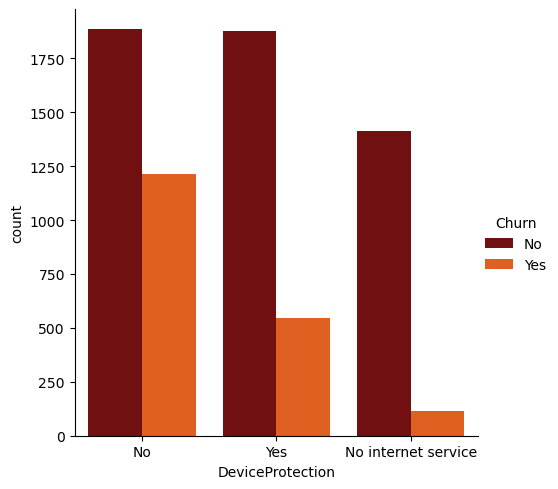

In [64]:
# Checking Churn level in DeviceProtection
sns.catplot(x = "DeviceProtection", hue = "Churn", data = df, palette = "gist_heat", kind = "count")
plt.show()

The customers who don't have any device protection have very high churn rate compared to others.

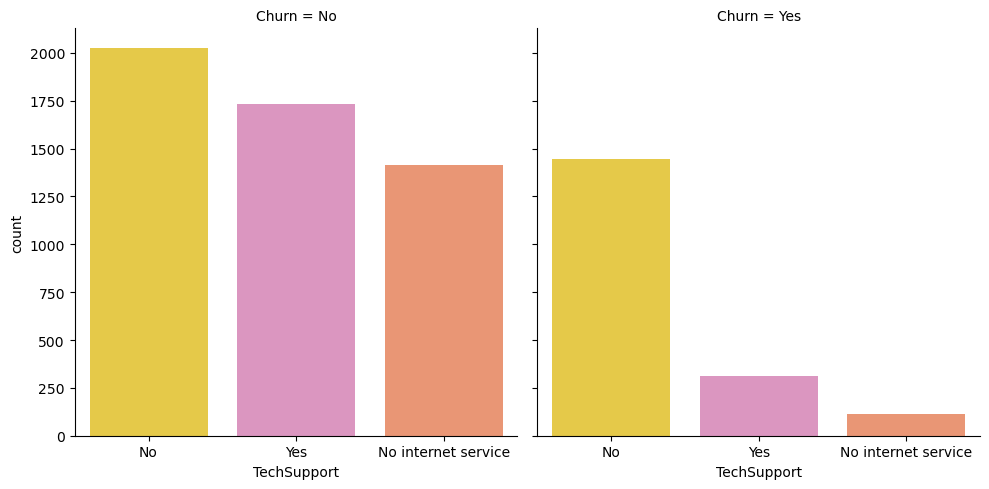

In [65]:
# Checking Churn level in TechSupport
sns.catplot(x = "TechSupport", col = "Churn", data = df, palette = "Set2_r", kind = "count")
plt.show()

Here we can clearly notice high churn rate from the customers who don't have techsupport than others.

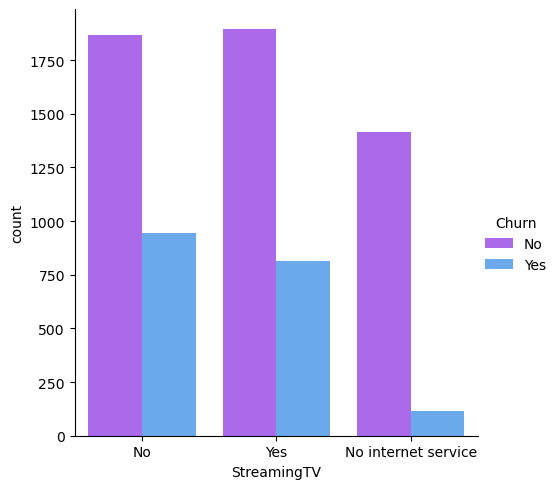

In [66]:
# Checking Churn level in StreamingTV
sns.catplot(x = "StreamingTV", hue = "Churn", data = df, palette = "cool_r", kind = "count")
plt.show()

Churn rate is almost same with customers own streamingTV or not.

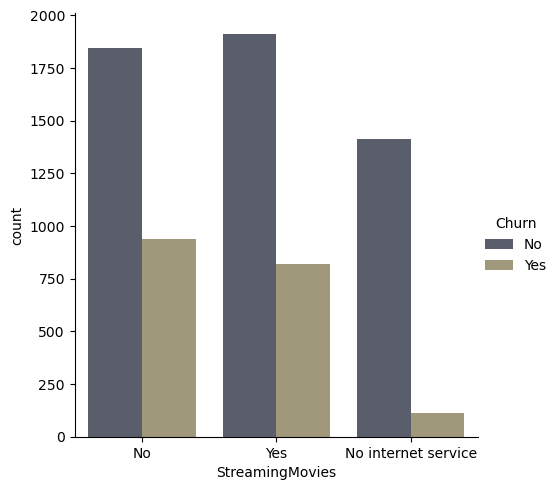

In [67]:
# Checking Churn level in StreamingMovies
sns.catplot(x = "StreamingMovies", hue = "Churn", data = df, palette = "cividis", kind = "count")
plt.show()

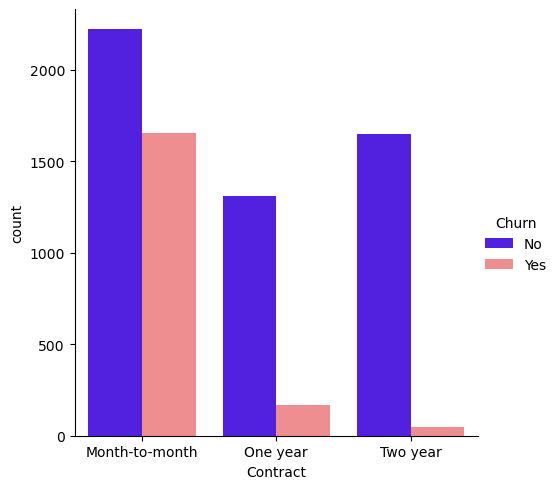

In [68]:
# Checking Churn level in Contract
sns.catplot(x = "Contract", hue = "Churn", data = df, palette = "gnuplot2", kind = "count")
plt.show()

Most churned customers are having month to month contract.

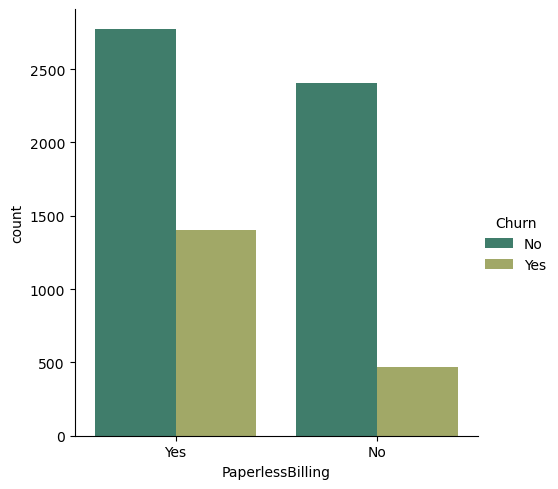

In [69]:
# Checking Churn level in PaperlessBilling
sns.catplot(x = "PaperlessBilling", hue = "Churn", data = df, palette = "gist_earth", kind = "count")
plt.show()

The customers who prefer paperless billing are having high churn rate.

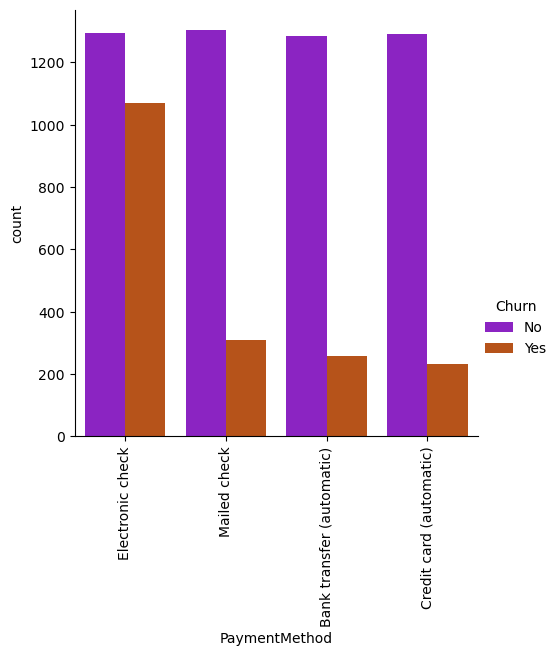

In [70]:
# Checking Churn level in PaymentMethod
sns.catplot(x = "PaymentMethod", hue = "Churn", data = df, palette = "gnuplot", kind = "count")
plt.xticks(rotation = 90)
plt.show()

The customers who prefer Electronic check payment method are having high churn rate. An equal no. of non churn customers are using each payment method. 

### Multivariate Analysis

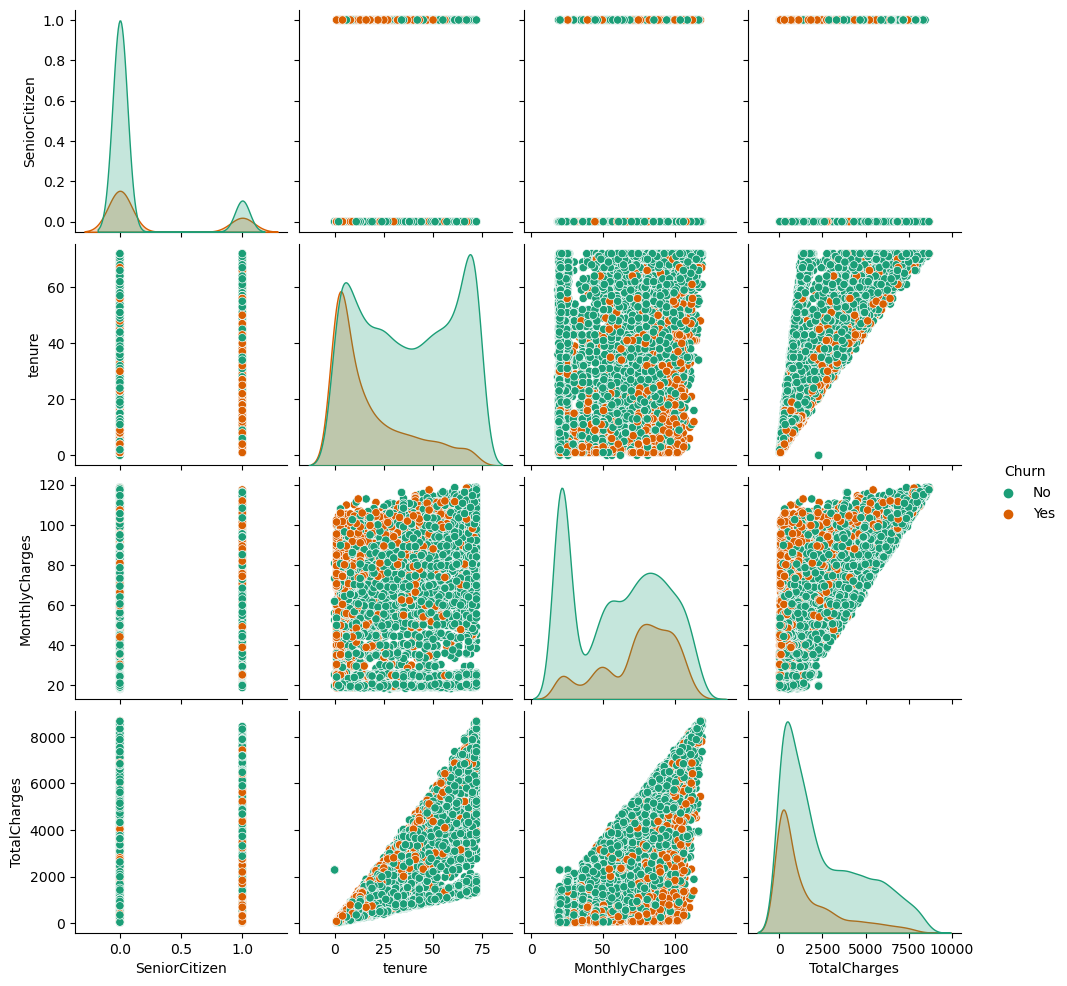

In [71]:
sns.pairplot(df, hue = "Churn", palette = "Dark2")
plt.show()

1. The pair plot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots of features.

2. The features tenure and TotalCharges, MonthlyCharges and TotalCharges have strong linear relation with each other.

3. There is no evidence of outliers in any of the features but let's use box plot to identify outliers. 

### Checking for Outliers

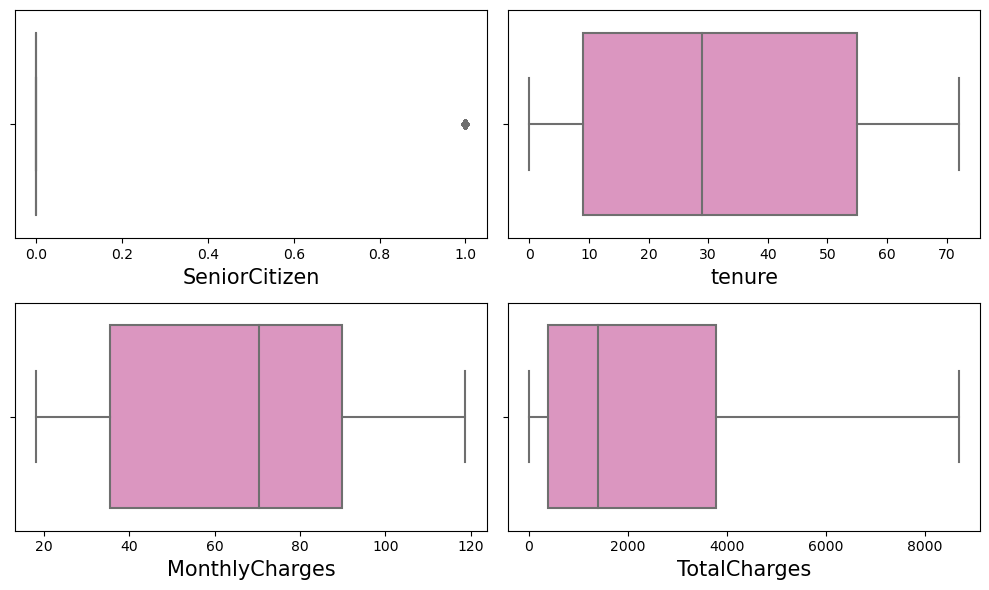

In [72]:
# let's check for outliers by plotting boxplot.
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1

for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
    
plt.tight_layout()

From the box plots we can notice that there are no outliers present in any of the features except SeniorCitizen feature. The SeniorCitizen feature contains outliers but it contains categorical data. Hence, no need to remove outliers here.

### Encoding categorical columns/ features

In [73]:
# Encoding categorical columns using OrdinalEncoder
# Converting categorical features to numerical features by using OrdinalEncoder
# Why converting? To understand skewness, noise and other statistical measures of all features it is required to 
# convert categorical columns to numerical columns.

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


We have converted the categorical columns into numerical columns using Ordinal Encoding method.

### Checking for Skewness

In [75]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. A perfectly symmetrical data set will have a skewness of 0. The normal distribution has a skewness of 0.

The rule of thumb for skewness:
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
2. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
3. If the skewness is less than -1 or greater than 1, the data are highly skewed

From the above we can see that most of the features: SeniorCitizen, Dependents, PhoneService (-vely skewed), Contract, TotalCharges and Churn are having skewness. We know all skewed features are categorical except TotalCharges. Hence, among all these skewed features we only need to consider TotalCharges feature skewness as this feature is continuous in nature. Let's use cube root method to remove skewness from the TotalCharges feature. 

### Removing Skewness

In [76]:
# Removing skewness using Cuberoot method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

We have now removed skewness from the TotalCharges feature using Cube root method.

In [77]:
# Checking the skewness again
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
Churn               1.063031
dtype: float64

Now we can see the skewness has been reduced in TotalCharges feature.

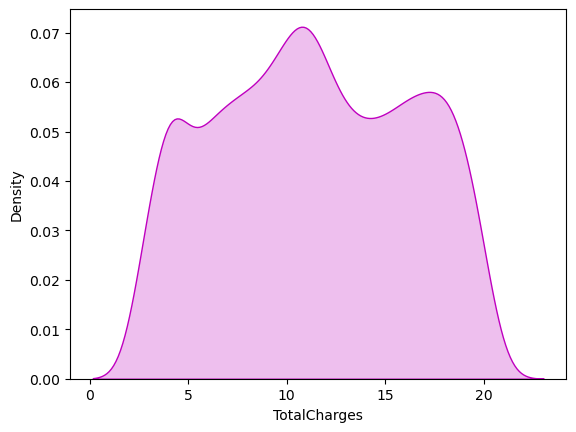

In [78]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df["TotalCharges"], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

The above distribution looks almost like normal and skewness is also removed.

In [79]:
# Statistical summary
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical columns we can see all column details here. Counts of all the columns are same that mean no null values in the data set. This describe method gives the information like count, mean, std, min, max, IQR, and median values of all the columns.

### Correlation between target and feature (independent) variables

In [80]:
# Checking correlation between features and the target
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives the correlation between dependent and independent variables. We can visualize it by plotting heatmap.

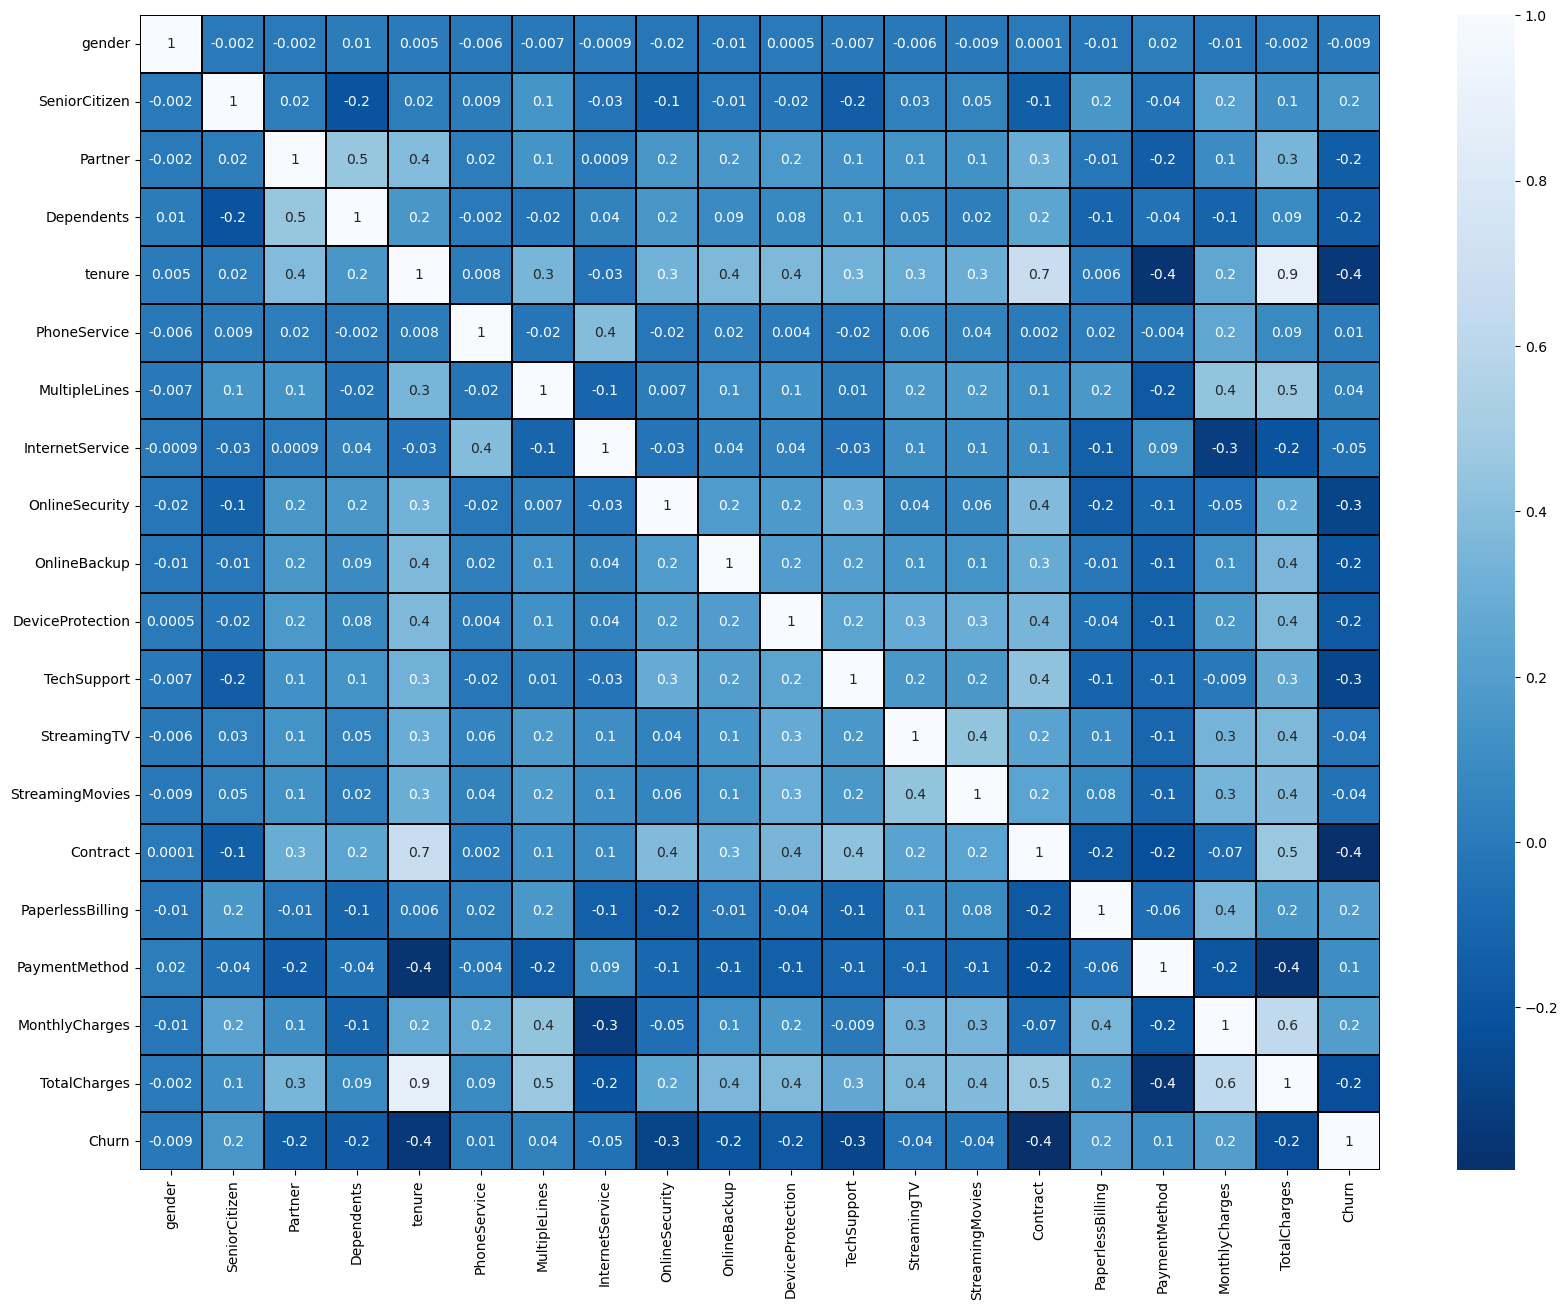

In [81]:
# Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0)
plt.show()

The heatmap shows the correlation matrix in a visual mode. We can observe the relation between feature to feature and feature to target label. Correlation value (r) lies between -1 and 1. -1 <= r <= 1. 
Positive correlation --- 0 < r <= 1
Negative correlation --- -1 <= r < 0

r = 0 - No correlation, -0.3 <= r <= 0.3 -- less correlation, r < - 0.5 or r > 0.5 -- moderate correlation, r < -0.7 or r > 0.7 -- high correlation

1. There is no much positive correlation between the target and features.

2. The columns MonthlyCharges, PaperlessBilling, SeniorCitizen,  and PaymentMethod shows a +ve correlation with the label "Churn".

3. The label is -vely correlated with with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

4. The column gender has very less correlation with the label and hence we can drop it if necessary.

5. Columns such as TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high +ve correlation with each other.


Heatmaps are definitely more intuitive and visual. It helps us to identify correlation between two variables strictly and fails to identify collinearity which exists between three or more variables.

What is Multicollinearity?
Multicollinearity refers to the condition when two or more independent features are correlated to each other. The change in one of the collinear features may affect the other related features. Multicollinearity in the dataset may be caused due to poor designing of experiments while collecting the data or maybe introduced while creating new features.

Multi-collinearity can be handled with the following two methods. Note that this correlation between independent variable leads to data redundancy, eliminating which can help get rid of multi-collinearity.

1. Introduce penalization or remove highly correlated variables: Use lasso and ridge regression to eliminate variables which provide information which is redundant. This can also be achieved by observing the variance inflation factor (VIF).

2. Combine highly correlated variables: Since the collinear variables contain redundant information, combining them into a single variable using methods such as principal component analysis (PCA) to generate independent variables.



When dealing with multicollinearity in your data, there are multiple strategies and techniques you can use. Feature selection involves choosing a subset of features that are relevant and informative for your model. You can use criteria such as domain knowledge, statistical tests, or regularization methods to select features. This can help reduce multicollinearity by removing redundant or irrelevant features. Feature extraction creates new features from existing ones by applying transformation or dimensionality reduction techniques, such as principal component analysis (PCA), factor analysis, or autoencoders. This can help reduce multicollinearity by creating new features that are uncorrelated or orthogonal to each other. Feature engineering is the process of creating new features from existing ones by applying domain knowledge or logic, using methods such as interaction terms, polynomial terms, or domain-specific functions. This can help reduce multicollinearity by creating new features that capture the nonlinear or complex relationships between features and the target variable.

In [82]:
# Checking correlation values of target label

cor["Churn"].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positively and negatively correlated features with the target label.

### Visualize the correlation between label and features using bar plot

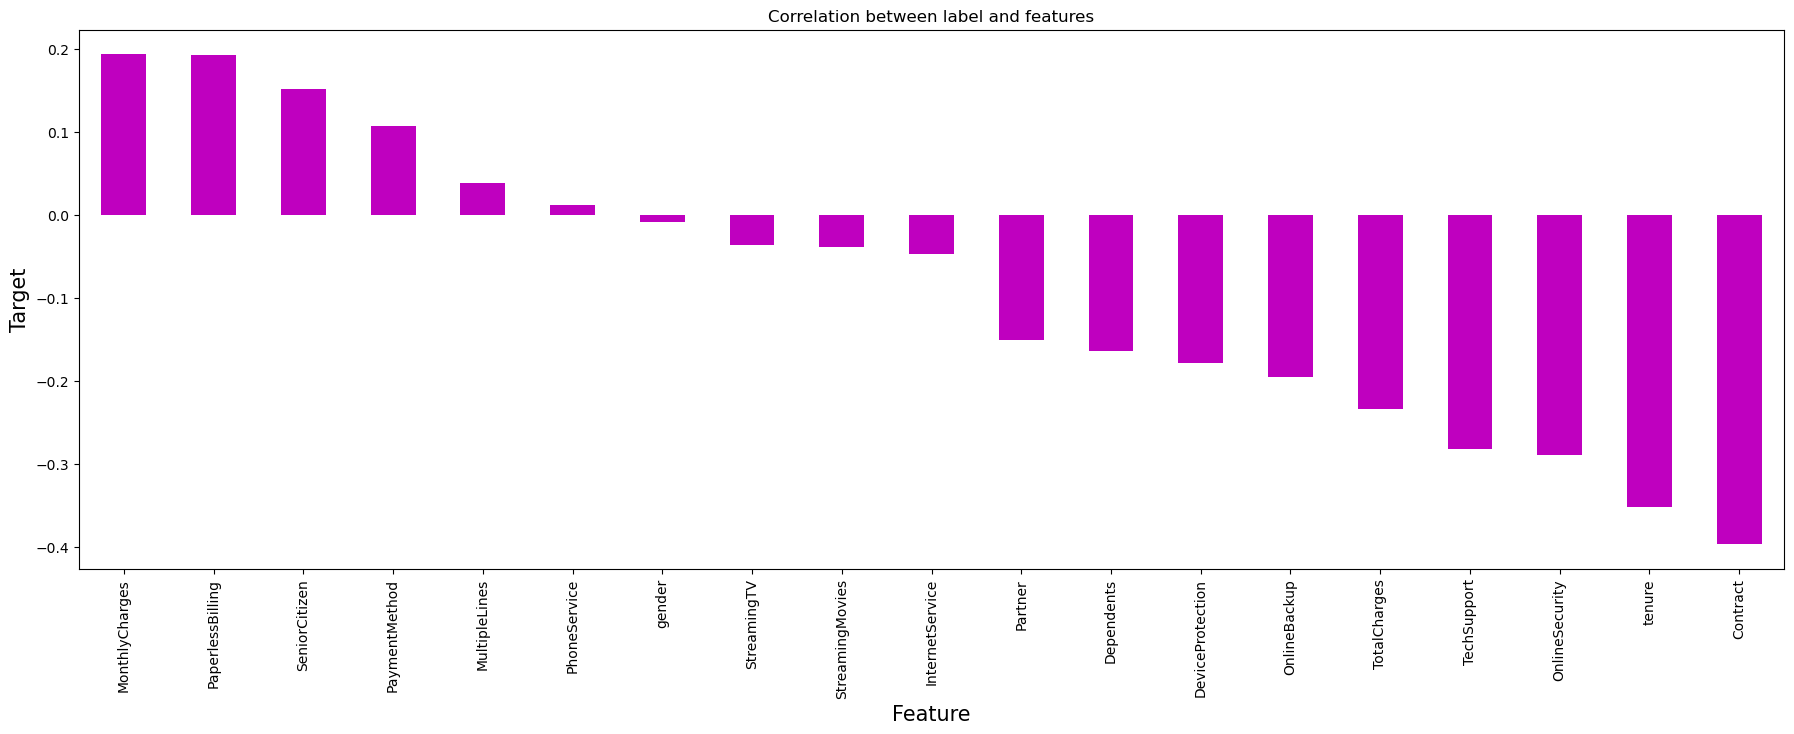

In [83]:
plt.figure(figsize = (22, 7))
df.corr()["Churn"].sort_values(ascending = False).drop(["Churn"]).plot(kind = "bar", color = "m")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.title("Correlation between label and features")
plt.show()

From the above bar plot we can easily notice that which features are positively or negatively correlated with the target label. Here the features, namely, gender and PhoneService have very less correlation with the label. 

### Separating features and label

In [84]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

### Feature Scaling using Standard Scalarization

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled/normalized the data using Standard Scalarization method to overcome the issue of biasness.

### Checking for Multi-collinearity using Variance Inflation Factor (VIF)

In [86]:
# Finding variance inflation factor in each scaled columns i.e, X

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Multicollinearity exists when there is a correlation between multiple independent variables.

VIF = 1/(1-R^2)


It is generally deemed that a feature that has a VIF value greater than 5 is highly collinear with other features in the data.

By checking VIF values we can find that the features are causing multicollinearity problem. Here we can see that features TotalCharges and tenure have VIF value greater than 10 which menas that they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF value.

In [87]:
# Dropping TotalCharges column
X.drop("TotalCharges", axis = 1, inplace = True)

In [88]:
# Again checking VIF values to confirm whether multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


By dropping the column with highest VIF value , we have solved multicollinearity problem. We can now move ahead for model building.

 Before model building, we need to do one more thing. As we noticed earlier the target label values are not balanced. We need to make balance using Oversampling method.

In [89]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here, we can see that data is imbalanced, since it is a classification problem we will balance the data using Oversampling method.

### Oversampling

In [90]:
# Oversampling the data 
# !pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1, y1 = sm.fit_resample(X,y)

In [91]:
# Checking value counts of target column
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [92]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

### Till now what we ghave done:

1. Import the libraries
2. Non graphical analysis
3. Graphical analysis: Univariate, Bivariate, and Multivariate analysis
4. Encode categorical columns
5. Check for outliers and handle them if they present
6. Check for Skewness and remove it if it present
7. Check for multicollinearity
8. Handling multicollinearity if it is present
9. Apply feature scaling methods on features vector X 
10. Apply feature selection methods
11. Apply resampling methods to balance the classes (in Classification problem)


### Applying Machine Learning Algorithm (Modelling)

Why do we set a random state in machine learning models?

The random state is used in many machine learning algorithms, including train-test split. The random state is used to shuffle the data before splitting it into a training set and a test set.


In Scikit-learn, the random state hyperparameter is denoted by random_state . Random state controls the shuffling applied to the data before applying the split. We use it in train_test_split for splitting data into training and testing dataset. It usually takes one of the following values.


1. None: This is the default value. This allows the function to use the global random state instance from np.random . If you call the same function multiple times with random_state=None, that function will produce different results across different executions.

2. int: We can use an integer for random_state . Yes! We can use any integer including 0, but not negative ones, only positive integers. The most popular integers are 0 and 42. When we use an integer for random_state, the function will produce the same results across different executions. The results are only changed if we change the integer value.

#### Finding the best random state

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


maxAccu = 0
bestRS = 0

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(X_train, y_train)
    
    pred = RFR.predict(X_test)
    accu = accuracy_score(y_test, pred)
    if accu > maxAccu:
        maxAccu = accu
        bestRS = i
        
print("Best accuracy is: ", maxAccu, "obtained at random_state: ", bestRS)

Best accuracy is:  0.8644122383252818 obtained at random_state:  141


### Creating train test data split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = bestRS)

### Classification ML Algorithms

In [95]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [96]:
# Checking accuracy of RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC = RFC.predict(X_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8589371980676328
[[1309  235]
 [ 203 1358]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1544
         1.0       0.85      0.87      0.86      1561

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy of Random forest classifier is 86.22%

### Logistic Regression

In [97]:
# Checking accuracy of LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.778743961352657
[[1157  387]
 [ 300 1261]]
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      1544
         1.0       0.77      0.81      0.79      1561

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



The accuracy score using Logistic Regression is 78.62%

### Support Vector Machine Classifier (SVC)

In [98]:
# Checking accuracy of Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train, y_train)
predsvc = svc.predict(X_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8112721417069243
[[1212  332]
 [ 254 1307]]
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81      1544
         1.0       0.80      0.84      0.82      1561

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



The accuracy score using SVC is 81.58%

### Gradient Boosting Classifier

In [99]:
# Checking accuracy of Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predGBC = GBC.predict(X_test)

print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

0.8502415458937198
[[1271  273]
 [ 192 1369]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1544
         1.0       0.83      0.88      0.85      1561

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



The accuracy score using Gradient Boosting Classifier is 85.15%

### AdaBoost Classifier

In [100]:
# Checking accuracy of AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predABC = ABC.predict(X_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8289855072463768
[[1211  333]
 [ 198 1363]]
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      1544
         1.0       0.80      0.87      0.84      1561

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



The accuracy score using AdaBoostClassifier is 83.35%

### BaggingClassifier

In [101]:
# Checking accuracy of BaggingClassifier
BC = BaggingClassifier()
BC.fit(X_train, y_train)
predBC = BC.predict(X_test)

print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8347826086956521
[[1318  226]
 [ 287 1274]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1544
         1.0       0.85      0.82      0.83      1561

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



The accuracy score using BaggingClasifier is 83.35% and is same as AdaBoost Classifier.

### ExtraTreesClassifier

In [102]:
# Checking accuracy of ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train)
predET = ET.predict(X_test)

print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8621578099838969
[[1313  231]
 [ 197 1364]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1544
         1.0       0.86      0.87      0.86      1561

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy score using ExtraTreesClassifier is 86.44% which is best accuracy score among all models used here.

### Cross Validation Score

In [103]:
from sklearn.model_selection import cross_val_score

cv = 5 --- it's a fold value 1, 2, 3, 4, 5 -- default value for cv is 5 

cross_val_score(modelname, features, targetlabel, cv = foldvalue, scoring = "accuracy")

In Classification algorithms -- default scoring parameter is accuracy

In Regression models -- default scoring parameter is r2 score

In [104]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predRFC) - score.mean())

[0.76908213 0.78937198 0.8942029  0.89560174 0.9120348 ]
0.8520587088443857
Difference b/w accuracy and cross validation scores is:  0.006878489223247075


In [105]:
# Checking cv score for Logistic Regression
score = cross_val_score(LR,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predLR) - score.mean())

[0.76859903 0.75942029 0.77681159 0.77718705 0.78347028]
0.7730976480504712
Difference b/w accuracy and cross validation scores is:  0.00564631330218579


In [106]:
# Checking cv score for Gradient Boosting Classifier
score = cross_val_score(GBC,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predGBC) - score.mean())

[0.752657   0.77971014 0.86908213 0.88061866 0.88593523]
0.8336006332261612
Difference b/w accuracy and cross validation scores is:  0.016640912667558627


In [107]:
# Checking cv score for Support Vector Machine Classifier
score = cross_val_score(svc,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predsvc) - score.mean())

[0.78164251 0.76859903 0.82028986 0.81295312 0.83276945]
0.8032507944513323
Difference b/w accuracy and cross validation scores is:  0.008021347255592004


In [108]:
# Checking cv score for AdaBoost Classifier
score = cross_val_score(ABC,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predABC) - score.mean())

[0.76570048 0.77342995 0.83236715 0.83276945 0.84726921]
0.8103072501126591
Difference b/w accuracy and cross validation scores is:  0.018678257133717624


In [109]:
# Checking cv score for Bagging Classifier
score = cross_val_score(BC,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predBC) - score.mean())

[0.73429952 0.75990338 0.88647343 0.88013533 0.89705172]
0.8315726750769935
Difference b/w accuracy and cross validation scores is:  0.0032099336186586225


In [110]:
# Checking cv score for Extra Trees Classifier
score = cross_val_score(ET,X1,y1)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predET) - score.mean())

[0.80338164 0.81304348 0.89516908 0.90091832 0.91300145]
0.8651027941804834
Difference b/w accuracy and cross validation scores is:  -0.0029449841965865087


Extra Tree Classifier is the best model as the difference between accuracy score and cross validation score is least among all other models. Here we can select Extra Trees Classification model as our best model.

### Hyper Parameter Tuning

In [111]:
# ExtraTrees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50, 100, 200, 300]}

In [112]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [113]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [114]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [115]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, n_jobs = -2, random_state = 1000)
Final_model.fit(X_train, y_train)

pred = Final_model.predict(X_test)
accu = accuracy_score(y_test, pred)
print(accu*100)

82.8341384863124


In [116]:
Final_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 100, n_jobs = -2, random_state = 1000)
Final_model.fit(X_train, y_train)

pred = Final_model.predict(X_test)
accu = accuracy_score(y_test, pred)
print(accu*100)

86.76328502415458


### Plotting ROC and compare AUC for all the models used

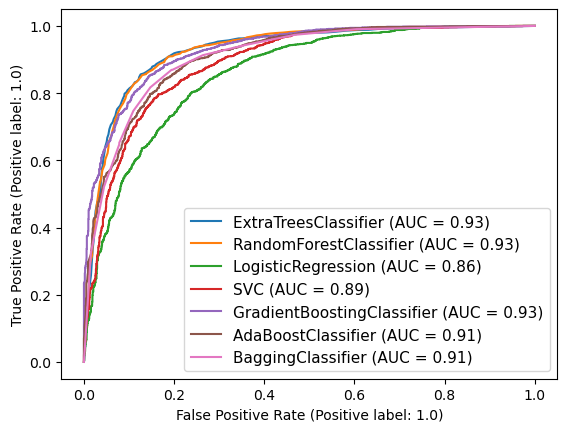

In [117]:
# Following method is deprecated so don't use in future.
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET, X_test, y_test)  # ax_ = Axes with confusion matrix
plot_roc_curve(RFC, X_test, y_test, ax = disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, X_test, y_test, ax = disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax = disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax = disp.ax_)
plot_roc_curve(BC, X_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 11}, loc = 'lower right')
plt.show()

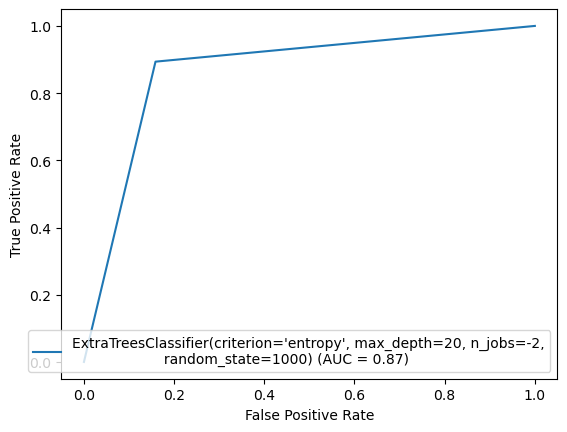

In [119]:
# Plotting ROC and compare AUC we use the following method.

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = Final_model)
display.plot()

Here, we have plotted the ROC curve for the final model and the AUC value for the best model is 87%.

### Saving the model 

In [120]:
# Saving the best model using .pkl
import joblib
joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

### Predicting the saved model

In [121]:
# Let's load the saved model and get the predictions

model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([0., 0., 1., ..., 1., 0., 1.])

These are the predicted churned values of the customers.

In [122]:
a = np.array(y_test)
df_com = pd.DataFrame()
df_com["Predicted"] = prediction
df_com["Original"] = a

df_com

,Predicted,Original
0,0.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3100,1.0,1.0
3101,1.0,1.0
3102,1.0,1.0
3103,0.0,0.0
